### Challenge Set 8
### Decision Trees Solutions
### Date:  1/4/2016
### By:  Julia


### Table of Contents 

[Challenge01](#1)

For the house representatives data set, fit and evaluate a decision tree classifier. Examine the rules your tree uses.


[Challenge02](#2)

Fit and evaluate a decision tree classifier for your movie dataset. Examine the rules your tree uses.
 

[Challenge03](#3)

(Optional but recommended)

Tackle the [Titanic Survivors kaggle competition](https://www.kaggle.com/c/titanic-gettingStarted) with decision trees. Look at your splits; how does your tree decide?


---

#### Installing pydot for the challenges:

You can examine the decision paths of an `sklearn` tree by generating `pydot` graphs as in the `sklearn` [documentation](http://scikit-learn.org/stable/modules/tree.html). It's sometimes tricky to get `pydot` working; see below for a possible install plan.

Note: Uninstall pydot if you already installed it but it's not working

```
pip uninstall pydot
```

Otherwise, you can start here:

    pip uninstall pyparsing

    pip install -Iv
    https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz#md5=9be0fcdcc595199c646ab317c1d9a709

    pip install pydot

    brew install graphviz


----

In [1]:
%pylab inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from patsy import dmatrices

Populating the interactive namespace from numpy and matplotlib


### <a id='1'></a> Challenge 1

For the house representatives data set, fit and evaluate a decision tree classifier. Examine the rules your tree uses.

In [2]:
names=names=['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution',
       'physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban',
        'aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
        'superfund-right-to-sue', 'crime','duty-free-exports','export-administration-act-south-africa']

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',names=names)
df=df.replace({'n':0,'y':1,'?':np.nan})
df=df.fillna(df.mean())
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


In [4]:
df=df.reset_index()

In [8]:
y=df['index']
X=df.drop('index',1)


In [9]:
y=y.replace({'republican':0,'democrat':1,'?':np.nan})

In [10]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=.30, random_state=4444)
model=DecisionTreeClassifier().fit(X_train,y_train)
export_graphviz(model,out_file='tree1.dot', feature_names=names)
!dot -Tpng tree1.dot -o tree1.png

<img src='tree1.png'>

### <a id='2'></a> Challenge 2

Fit and evaluate a decision tree classifier for your movie dataset. Examine the rules your tree uses.

In [11]:
movies = pd.read_csv('../../challenges_data/2013_movies.csv')

In [20]:
movies.head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00


In [23]:
# Transform ReleaseDate into a continuous number.. 
movies['Date'] = pd.DatetimeIndex(movies.ReleaseDate)
movies.Date = movies.Date.astype(np.int64)
movies.head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Date
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1385078400000000000


In [23]:
# We can see from the following summary that some 'Budget'values are missing..  
movies.describe()

,Budget,DomesticTotalGross,Runtime,Date
count,8.900000e+01,1.000000e+02,100.000000,1.000000e+02
mean,7.474719e+07,1.005969e+08,112.260000,1.373985e+18
std,5.941692e+07,8.739641e+07,18.190696,9.081699e+15
min,2.500000e+06,2.556825e+07,75.000000,1.357258e+18
25%,2.800000e+07,4.270413e+07,98.000000,1.366178e+18
50%,5.500000e+07,6.954237e+07,112.000000,1.374192e+18
75%,1.100000e+08,1.204759e+08,123.000000,1.382054e+18
max,2.250000e+08,4.246680e+08,180.000000,1.388102e+18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10920bdd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c9f51d0>]], dtype=object)

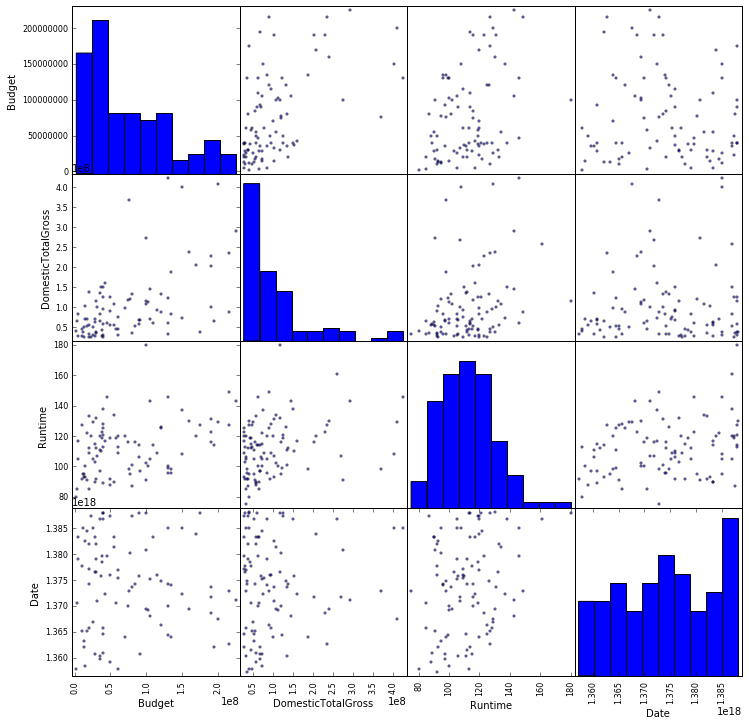

In [24]:
pd.scatter_matrix(movies,figsize=(12,12))

In [24]:
# We can see that 'Budget' has some correlation with DTG and Runtime, 
#I am going to fill in the missing 'Budget' Values using a regression built off of these variables.

#Here is the subset of data that we will need to fill..
subset=movies[movies['Budget'].isnull()]
subset.head

<bound method DataFrame.head of                                                 Title  Budget  \
6                                 Monsters University     NaN   
7                 The Hobbit: The Desolation of Smaug     NaN   
66                    Tyler Perry's A Madea Christmas     NaN   
67  Tyler Perry's Temptation: Confessions of a Mar...     NaN   
73                          Instructions Not Included     NaN   
74                                             Snitch     NaN   
78                               August: Osage County     NaN   
83                                  Texas Chainsaw 3D     NaN   
85                                       Blue Jasmine     NaN   
86                         Kevin Hart: Let Me Explain     NaN   
87                                       Side Effects     NaN   

    DomesticTotalGross           Director Rating  Runtime  \
6            268492764        Dan Scanlon      G      107   
7            258366855      Peter Jackson  PG-13      161   
66  

In [25]:
# We will build a regression off of the values that are not null
filled = movies[movies['Budget'].notnull()]

y_fill,X_fill = dmatrices('Budget~DomesticTotalGross+Runtime',data=filled,return_type='dataframe')

In [26]:
from patsy import dmatrix
from sklearn.linear_model import LinearRegression

#subset_X=subset[['DomesticTotalGross','Runtime']]
subset_X=dmatrix('DomesticTotalGross+Runtime',data=subset,return_type='dataframe')

model=LinearRegression()
model.fit(X_fill,y_fill)

subset['Budget']=model.predict(subset_X)

data=subset.append(filled)

# Now we can see that missing values within 'Budget' have been filled.
data=data.sort_index()
data.head(10)



/Users/julialintern/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Date
0,The Hunger Games: Catching Fire,1.300000e+08,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1385078400000000000
1,Iron Man 3,2.000000e+08,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1367539200000000000
2,Frozen,1.500000e+08,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1385078400000000000
3,Despicable Me 2,7.600000e+07,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1372809600000000000
4,Man of Steel,2.250000e+08,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1371168000000000000
5,Gravity,1.000000e+08,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00,1380844800000000000
6,Monsters University,1.241458e+08,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00,1371772800000000000
7,The Hobbit: The Desolation of Smaug,1.624473e+08,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00,1386892800000000000
8,Fast & Furious 6,1.600000e+08,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00,1369353600000000000
9,Oz The Great and Powerful,2.150000e+08,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00,1362700800000000000


In [27]:
# We are also missing a (4) directors. . im just going to drop those

data=data[['DomesticTotalGross','Budget','Director','Rating','Runtime','Date']]
data=data.dropna()
print len(data)

96


In [28]:
from patsy import dmatrices

y, X=dmatrices('DomesticTotalGross~Budget+Director+Rating+Runtime+Date',data=data,return_type='dataframe')
X.head(1)

,Intercept,Director[T.Alan Taylor],Director[T.Alfonso Cuaron],Director[T.Andres Muschietti],Director[T.Andrew Niccol],Director[T.Antoine Fuqua],Director[T.Baltasar Kormakur],Director[T.Barry CookNeil Nightingale],Director[T.Baz Luhrmann],Director[T.Ben Stiller],...,Director[T.Tommy Wirkola],Director[T.Tyler Perry],Director[T.Woody Allen],Director[T.Zack Snyder],Rating[T.PG],Rating[T.PG-13],Rating[T.R],Budget,Runtime,Date
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,130000000,146,1.385078e+18


In [29]:
# import for regression trees!
from sklearn.tree import DecisionTreeRegressor

In [33]:
names=X.columns.values

In [34]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=.30, random_state=4444)
# Limiting max_depth to 6 (so we can see output!)
model=DecisionTreeRegressor(max_depth=6).fit(X_train,y_train)
export_graphviz(model,out_file='tree2.dot', feature_names=names)
!dot -Tpng tree2.dot -o tree2.png

<img src='tree2.png'>

In [36]:
imp=model.feature_importances_

In [37]:
feature_importances=pd.DataFrame(columns=['importances','names'])
feature_importances.importances=imp
feature_importances.names=X.columns

In [38]:
# We can see how feature importances correspond to our tree above
feature_importances=feature_importances.sort('importances')
feature_importances.tail()

/Users/julialintern/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,importances,names
2,0.076187,Director[T.Alfonso Cuaron]
14,0.087902,Director[T.Carl Rinsch]
97,0.133892,Runtime
98,0.205120,Date
96,0.407490,Budget


### <a id='3'></a> Challenge 3

(Optional but recommended)

Tackle the [Titanic Survivors kaggle competition](https://www.kaggle.com/c/titanic-gettingStarted) with decision trees. Look at your splits; how does your tree decide?

In [39]:
# This will be a classification problem (predict whether survived or not.. )

In [43]:
data = pd.read_csv('../../challenges_data/titanic_train.csv')

In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [41]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
# We can from above, we will have to 'revise a few things!' .. 
# 1st thing:  I want transform Pclass,SibSp and Parch to categorical variables.

data.Pclass=data.Pclass.astype(str)
data.SibSp=data.SibSp.astype(str)
data.Parch=data.Parch.astype(str)

In [43]:
#data.head(1)

In [44]:
# 2ndly, we see that the Age column has missing values. 
# A quick confirmation with scatter_matrix, shows there are no strong correlations with age.  
# Leave missing values in for now;

In [46]:
# The following shows the 'Cabin' also has many missing values, I am going to leave these out.
for i in data.columns:
    print i,len(data[data[i].isnull()])

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [47]:
y,X=dmatrices('Survived~Pclass+Age+SibSp+Parch+Fare+Embarked',data=data,return_type='dataframe')

In [48]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=1234)

In [49]:
# Running the Classifier, & checking accuracy.

tree_class=DecisionTreeClassifier()
tree_class.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [50]:
from sklearn import metrics
conf=metrics.confusion_matrix(y_test,tree_class.predict(X_test))
print conf

[[78 28]
 [38 34]]


In [51]:
print 'fpr',metrics.roc_curve(y_test,tree_class.predict(X_test))[0][1]
print 'tpr',metrics.roc_curve(y_test,tree_class.predict(X_test))[1][1]

print 'Accuracy',metrics.accuracy_score(y_test,tree_class.predict(X_test))

fpr 0.264150943396
tpr 0.472222222222
Accuracy 0.629213483146


In [52]:
feat= pd.DataFrame({'importances':tree_class.feature_importances_,'features':X.columns})
feat=feat.sort('importances')
feat.tail(5)

/Users/julialintern/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,features,importances
10,Parch[T.2],0.032200
3,SibSp[T.1],0.036994
16,Embarked[T.S],0.037374
18,Fare,0.381891
17,Age,0.383137


In [52]:
y.describe()

,Survived
count,712.000000
mean,0.404494
std,0.491139
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


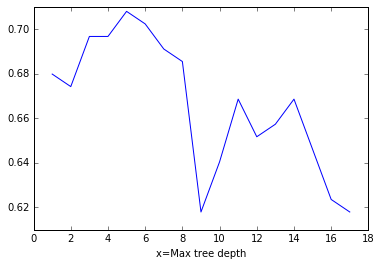

In [53]:
# Prior to printing the Tree, I would like to learn what the optimal 'max_depth' is for my model:
from sklearn.cross_validation import cross_val_score

all_scores=[]
best_score=0
best_depth=0

for i in range(1,18):
    tree_class=DecisionTreeClassifier(max_depth=i)
    tree_class.fit(X_train,y_train)
    scores=metrics.accuracy_score(y_test,tree_class.predict(X_test))
    all_scores.append(scores)
    
plt.figure()
plt.plot(range(1,18),all_scores)
plt.xlabel('x=Max tree depth')

In [54]:
# Limiting max_depth to 6 (as per above,)
model=DecisionTreeRegressor(max_depth=4).fit(X_train,y_train)
export_graphviz(model,out_file='tree3.dot', feature_names=X.columns.values)
!dot -Tpng tree3.dot -o tree3.png

<img src='tree3.png'>

'How does the tree decide to split': 

Based on Information Gain.  (Tree looks for the 'most pure' features (ie: features that have high counts of one class or another). 
If a feature is continuous (as in this case our two strongest features are continuous): the tree uses the principle of 'reduction of variance' (and will choose the 1st split to be the one that provides the miniumum variance.)

Extra Credit: Try and Improve your Decision Tree Classification model

In [55]:
# In effort to improve my model, I am going to fillna() for 'AGE'  
#--  I will do this by using a   decision tree Regressor to impute the missing Age values

In [56]:
# 1st we will train on the data with no missing values:

sub=data[data.Age.notnull()]

sub_y,sub_x=dmatrices('Age~Pclass+Fare+Embarked',data=data,return_type='dataframe')

new_tree=DecisionTreeRegressor()
new_tree.fit(sub_x,sub_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [58]:
age_to_fill=data[data.Age.isnull()]
test_x=dmatrix('Pclass+Fare+Embarked',data=age_to_fill,return_type='dataframe')

age_to_fill.Age=new_tree.predict(test_x)

/Users/julialintern/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [59]:
new_data=age_to_fill.append(sub)
new_data=new_data.sort_index()

new_data.describe()

,PassengerId,Survived,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.845323,32.204208
std,257.353842,0.486592,13.785349,49.693429
min,1.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,21.000000,7.910400
50%,446.000000,0.000000,29.000000,14.454200
75%,668.500000,1.000000,36.000000,31.000000
max,891.000000,1.000000,80.000000,512.329200


In [60]:
y,X=dmatrices('Survived~Pclass+Age+SibSp+Parch+Fare+Embarked',data=new_data,return_type='dataframe')

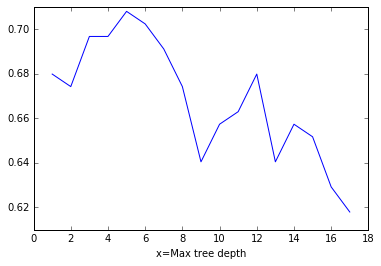

In [61]:
# Prior to printing the Tree, I would like to learn what the optimal 'max_depth' is for my model:
from sklearn.cross_validation import cross_val_score

all_scores=[]
best_score=0
best_depth=0

for i in range(1,18):
    tree_class=DecisionTreeClassifier(max_depth=i)
    tree_class.fit(X_train,y_train)
    scores=metrics.accuracy_score(y_test,tree_class.predict(X_test))
    all_scores.append(scores)
    
plt.figure()
plt.plot(range(1,18),all_scores)
plt.xlabel('x=Max tree depth')

In [62]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=1234)

tree_class=DecisionTreeClassifier(max_depth=2)
tree_class.fit(X_train,y_train)


print 'fpr',metrics.roc_curve(y_test,tree_class.predict(X_test))[0][1]
print 'tpr',metrics.roc_curve(y_test,tree_class.predict(X_test))[1][1]

print 'Accuracy',metrics.accuracy_score(y_test,tree_class.predict(X_test))

fpr 0.145038167939
tpr 0.597826086957
Accuracy 0.748878923767


In [63]:
# We can see from the above, that by imputing the missing 'Age' values, we are able to increase our 
# accuracy about 0.08